In [1]:
from googleapiclient.discovery import build 
import pandas as pd 
import seaborn as sns 


In [66]:
api_key = 'Your api key'
sidemen_channels= ['UCGmnsW623G1r-Chmo5RB4Yw', #jj
                  
                   ]


youtube = build('youtube', 'v3', developerKey=api_key)

In [68]:
def get_channel_stat(youtube, sidemen_channels):
    data = []
    for channel_id in sidemen_channels:
        request = youtube.channels().list(
            part='snippet,contentDetails,statistics',
            id=channel_id
        )
        response = request.execute()
        channel_name = response['items'][0]['snippet']['title']
        subscriber_count = response['items'][0]['statistics']['subscriberCount']
        views = response['items'][0]['statistics']['viewCount']
        total_videos = response['items'][0]['statistics']['videoCount']
        play= response['items'][0]['contentDetails']['relatedPlaylists']['uploads']
       
        data.append({
            'Channel Name': channel_name,
            'Subscriber Count': subscriber_count,
            'Views': views,
            'Total Videos': total_videos,
            'Play' : play
        })
    return pd.DataFrame(data)

In [91]:
channel_data = get_channel_stat( youtube , sidemen_channels)
channel_data


,Channel Name,Subscriber Count,Views,Total Videos,Play
0,JJ Olatunji,16200000,3981871712,1260,UUGmnsW623G1r-Chmo5RB4Yw


In [70]:
playlist_id = channel_data.loc[channel_data['Channel Name'] == 'JJ Olatunji' , 'Play' ].iloc[0]
playlist_id

'UUGmnsW623G1r-Chmo5RB4Yw'

In [71]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()
    video_ids = []
    for i in range (len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                    part='contentDetails',
                    playlistId=playlist_id,
                    maxResults = 50,
                     pageToken = next_page ) 
            response = request.execute()

            for i in range (len(response['items'])):
              video_ids.append(response['items'][i]['contentDetails']['videoId'])

            next_page = response.get('nextPageToken')
        


    return video_ids

In [120]:
video_ids = get_video_ids ( youtube , playlist_id)
video_ids

['mSbQoHQGJFg',
 '4tKNoHP4HEw',
 'ZsKzJuNvzkQ',
 'Iv5On2UFTvQ',
 'mKHNX7Buug4',
 'rpNnpEymaZM',
 '0D_xoruumGo',
 'rLsgqNMr2EI',
 'gqzUfLTefrQ',
 'u92CrMM8C8Q',
 'yg_W09rX_ak',
 'zprC97brth0',
 'vn6lYiBNZuA',
 'fxe7oicgS8s',
 'yYKmo8fO5Ak',
 'h4pgpNSLUvk',
 'iHwAueRL964',
 'XVw1wcpj6y8',
 'bysxMKbLrDg',
 'RiS_zKisgzk',
 'UXnbKkTHfMU',
 'CxdWQVzjIHQ',
 'O6uH3THa5xU',
 'vSPOyqulBlg',
 '6NVCkSZf91c',
 'ETJZepkfH9I',
 '7pD4r4d8kUQ',
 '2q_P0RS8JaA',
 'CzVgdx20l9k',
 '7ushg6kQHiQ',
 'YS_CkXmFrbI',
 'cKgLowhoQ-M',
 'WRG-2Ae-Ch0',
 'mACrgq33ESw',
 'IwWtlreKO4s',
 'KJsa6XcHWgs',
 'y377mGMFaxc',
 'dR_NNYj8uPc',
 'zP26BcLPIFQ',
 'AV9akbzb3hc',
 'LSUFJmtWx-E',
 'acSb4K7FSMw',
 'YaXPATZ_cB0',
 '1Bju4aZriuI',
 'FepuXBvG06U',
 'DgdmX5F0KWE',
 'l1NNc3I0jFs',
 'XreCah5Idjg',
 'BmJoACNf2uU',
 '64mYIUmQsmI',
 'bxI7VzddHyI',
 'PEzRoqMaA5U',
 'vM8-c-4q3BY',
 'RTW6keQqNNw',
 '2WrX8QMbXMQ',
 '0cxqzK-iD40',
 'HZa9jn-ovLg',
 'EmehQ-y0IB0',
 'b8vgV-ddRYo',
 'sAJZ5dzhYrc',
 'Qt8ugeD8oco',
 'hGEUCDmSAD0',
 'afIMsm

In [118]:
def get_video_details(youtube, video_ids):
    allstats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part='snippet,statistics',
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute()
        for video in response['items']:
            video_stats = dict(
                Title=video['snippet']['title'],
                Publised_date=video['snippet']['publishedAt'],
                Views=video['statistics']['viewCount']
            )
            allstats.append(video_stats)
    return pd.DataFrame(allstats)

    

In [123]:
video_details = get_video_details ( youtube, video_ids)
final_data = pd.DataFrame(video_details)
final_data


,Title,Publised_date,Views
0,Is This Happening?,2023-03-21T18:18:44Z,1862506
1,Reacting To My Public Appearances,2023-03-20T18:35:02Z,1915653
2,ChatGPT Doesn't Rate Me,2023-03-18T15:25:44Z,1594558
3,BRUTALLY HONEST REVIEW OF PRIME,2023-03-17T17:12:14Z,2434626
4,Am I A Mean Person?,2023-03-10T16:26:37Z,3071262
...,...,...,...
1255,Dragon Ball Z Ultimate Tenkaichi - Playthrough #2,2011-10-31T16:17:48Z,140605
1256,Dragon Ball Z Ultimate Tenkaichi - Playthrough #1,2011-10-31T15:51:27Z,121313
1257,Battlefield 3 | Shotguns are BEAST!,2011-10-31T12:22:04Z,209015
1258,Scary Games,2011-09-04T13:21:20Z,374400


In [125]:
final_data['Publised_date'] = pd.to_datetime(final_data['Publised_date']).dt.date
final_data['Views'] = pd.to_numeric(final_data['Views'])


In [130]:
top_10 = final_data.sort_values(by='Views' , ascending = False).head(10)
top_10

,Title,Publised_date,Views
746,KSI Plays | A RACIST COMPUTER PROGRAM,2014-08-26,26488395
418,TRY NOT TO PERISH CHALLENGE,2019-02-26,22539587
202,TRY NOT TO LAUGH (African Edition 2),2020-12-08,22504056
240,It‘s So Hard Not To Laugh At This,2020-10-01,21673292
417,TRY NOT TO LAUGH (ULTIMATE EDITION),2019-02-27,21169682
186,Try Not To Laugh (Inappropriate Edition),2021-02-10,19066271
347,REACTING TO EVERY DISSTRACK AT ME,2020-04-19,18794556
439,GUESS HER AGE?,2019-02-04,18736125
472,Watching Weird Videos,2019-01-02,18556313
337,TRY NOT TO LAUGH DANK MEMES,2020-04-30,18392629


In [132]:
final_data.to_csv('jj_youtube_career.csv', index=False)


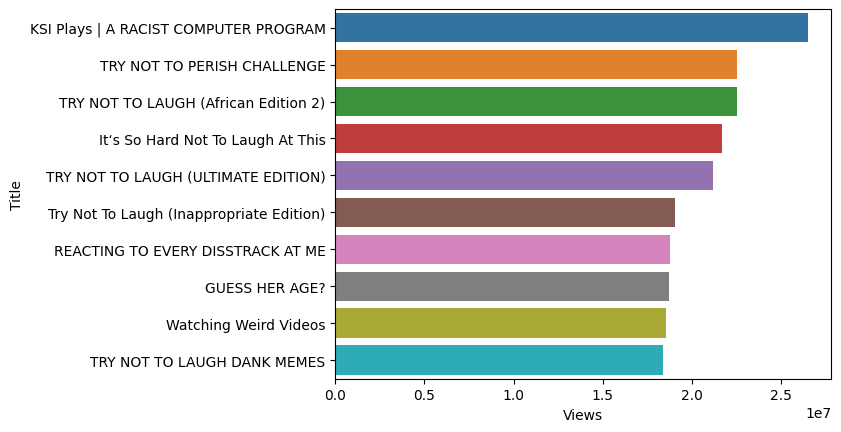

In [131]:
plot = sns.barplot( x = 'Views' , y='Title' , data=top_10)